<a href="https://colab.research.google.com/github/Rexfarell/Building-a-Simple-Chatbot-in-Python-using-NLTK/blob/master/Multiclass_text_classification_glove100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
! ls

gdrive	sample_data


In [3]:
%cd gdrive/My Drive/

/content/gdrive/My Drive


In [6]:
! git clone https://github.com/Rexfarell/CEFR.git

Cloning into 'CEFR'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-02-07 04:51:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-02-07 04:51:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-02-07 04:51:21--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [10]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
!ls
!pwd #the dir where glove is saved and unzipped


['My day\nFirst, I wake  Then, I get dressed. I walk to school. I do not ride a bike. I do not ride the bus. I like to go to school. It rains. I do not like rain. I eat lunch. I eat a sandwich and an apple.\nI play outside. I like to play. I read a book. I like to read books. I walk home. I do not like walking home. My mother cooks soup for dinner. The soup is hot. Then, I go to bed. I do not like to go bed.', "Evelyn's daily routine\nEvelyn lives in Houston, Texas. She is eleven and studies at Theodore Roosevelt School.\nShe is in sixth grade. Every morning she gets up at 6:00 a.m., takes a shower and has breakfast.\nAt noon, she usually has lunch with her mother. She is a housewife and a web designer too. She designs nice web sites. His father is a mechanic.\nIn the afternoon, she goes to school and she comes back at 6:00 p.m. Then she does her homework, has dinner and helps her mother wash the dishes. She doesn’t watch TV on weekdays. She goes to bed at about 10:00 p.m.\nOn weekends

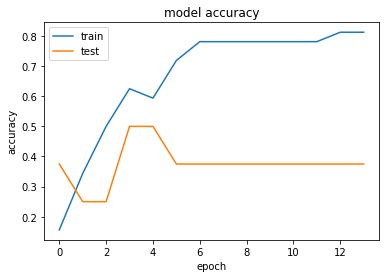

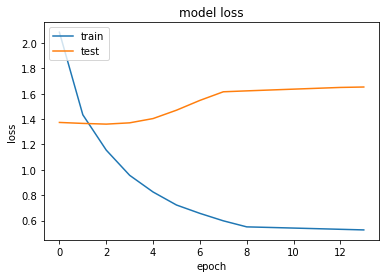


Fold
 1
TRAIN: [ 1  2  3  4  6  7  8  9 10 11 13 14 15 17 18 19 20 22 23 24 25 26 27 28
 31 33 34 35 36 37 38 39] TEST: [ 0  5 12 16 21 29 30 32]
Train on 32 samples, validate on 8 samples
Epoch 1/25
32/32 [==============================] - 0s 11ms/sample - loss: 1.8230 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4221 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/25
32/32 [==============================] - 0s 3ms/sample - loss: 1.8174 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4127 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/25
32/32 [==============================] - 0s 2ms/sample - loss: 1.8099 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4103 - val_sparse_categorical_accuracy: 0.2500
Epoch 4/25
32/32 [==============================] - 0s 533us/sample - loss: 1.8010 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4115 - val_sparse_categorical_accuracy: 0.2500
Epoch 5/25
32/32 [==============================] - 0s 694us/sample - loss: 1.7913 - sp

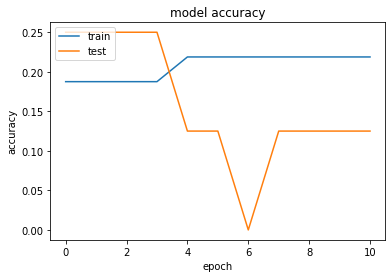

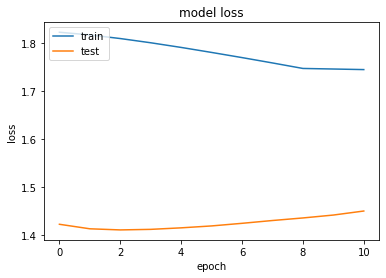


Fold
 2
TRAIN: [ 0  1  2  4  5  6  7  8 10 12 13 14 16 17 18 19 20 21 23 24 25 26 27 29
 30 32 33 34 35 37 38 39] TEST: [ 3  9 11 15 22 28 31 36]
Train on 32 samples, validate on 8 samples
Epoch 1/25
32/32 [==============================] - 1s 16ms/sample - loss: 1.4790 - sparse_categorical_accuracy: 0.4375 - val_loss: 1.4101 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/25
32/32 [==============================] - 0s 622us/sample - loss: 1.4786 - sparse_categorical_accuracy: 0.4375 - val_loss: 1.4143 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/25
32/32 [==============================] - 0s 447us/sample - loss: 1.4780 - sparse_categorical_accuracy: 0.4375 - val_loss: 1.4227 - val_sparse_categorical_accuracy: 0.2500
Epoch 4/25
32/32 [==============================] - 0s 427us/sample - loss: 1.4773 - sparse_categorical_accuracy: 0.4375 - val_loss: 1.4329 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/25
32/32 [==============================] - 0s 447us/sample - loss: 1.4766 

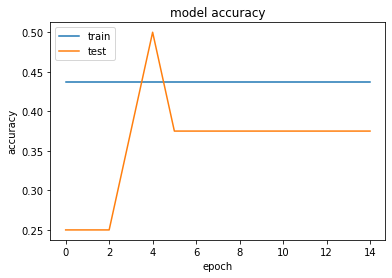

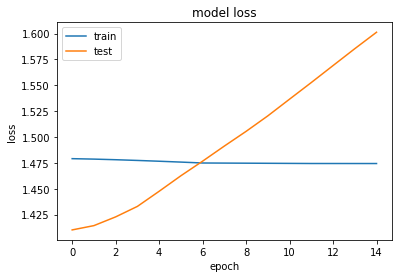


Fold
 3
TRAIN: [ 0  1  3  4  5  6  8  9 10 11 12 13 14 15 16 17 20 21 22 23 24 26 28 29
 30 31 32 33 35 36 37 39] TEST: [ 2  7 18 19 25 27 34 38]
Train on 32 samples, validate on 8 samples
Epoch 1/25
32/32 [==============================] - 1s 19ms/sample - loss: 1.8189 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.6986 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/25
32/32 [==============================] - 0s 3ms/sample - loss: 1.8189 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.6888 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/25
32/32 [==============================] - 0s 3ms/sample - loss: 1.8188 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.6805 - val_sparse_categorical_accuracy: 0.2500
Epoch 4/25
32/32 [==============================] - 0s 8ms/sample - loss: 1.8188 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.6755 - val_sparse_categorical_accuracy: 0.2500
Epoch 5/25
32/32 [==============================] - 0s 4ms/sample - loss: 1.8188 - sparse

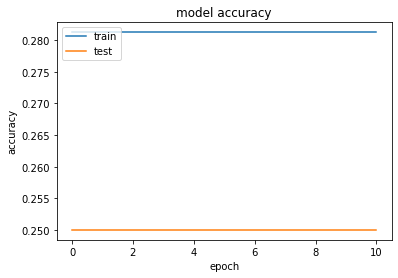

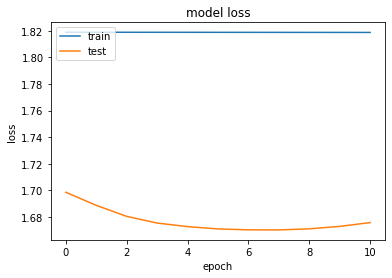


Fold
 4
TRAIN: [ 0  2  3  4  5  6  7  9 11 12 13 15 16 17 18 19 21 22 24 25 26 27 28 29
 30 31 32 33 34 35 36 38] TEST: [ 1  8 10 14 20 23 37 39]
Train on 32 samples, validate on 8 samples
Epoch 1/25
32/32 [==============================] - 1s 26ms/sample - loss: 1.6562 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4046 - val_sparse_categorical_accuracy: 0.1250
Epoch 2/25
32/32 [==============================] - 0s 697us/sample - loss: 1.6562 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4077 - val_sparse_categorical_accuracy: 0.1250
Epoch 3/25
32/32 [==============================] - 0s 546us/sample - loss: 1.6562 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4114 - val_sparse_categorical_accuracy: 0.1250
Epoch 4/25
32/32 [==============================] - 0s 507us/sample - loss: 1.6562 - sparse_categorical_accuracy: 0.1875 - val_loss: 1.4166 - val_sparse_categorical_accuracy: 0.1250
Epoch 5/25
32/32 [==============================] - 0s 482us/sample - loss: 1.6562 

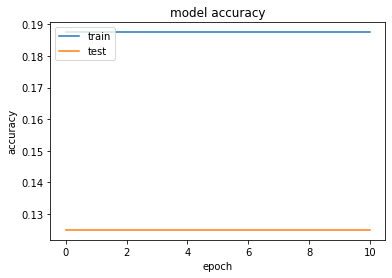

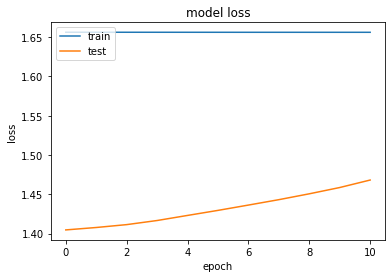

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           1000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 49, 64)            12864     
_________________________________________________________________
batch_normalization_4 (Batch (None, 49, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                15370     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                

In [13]:
#author Eric Ávila  Multiclass single lable text classifier_Version 2.0, not optimized for the dataset yet
#Compatible for Tensorflow 2

#Tensorflow2
#Hyperparameters:
#filters:64
#batch_size:32
#kernel_size=2
#patience_lr=5,patience_earlyStop=10




import os
import string
import keras
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import numpy as np
import tensorflow as tf
from numpy import array
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

from numpy.random import seed
seed(1)

tf.compat.v2.random.set_seed(1)


root="/content/gdrive/My Drive/CEFR/CEFR_corpus"    
train_dir=os.path.join(root,"Train")

texts=[]
labels=[]

for label in ["A1","A2","B1","B2"]:
     directory=os.path.join(train_dir,label)
     for fname in os.listdir(directory):
         if fname[-4:]==".txt":
             f = open(os.path.join(directory, fname),encoding="utf-8")
             texts.append(f.read())
             f.close()
             if label == "A1":
                 labels.append(0)
             elif label=="A2":
                       labels.append(1)
             elif label=="B1":
                  labels.append(2)
             else:
                labels.append(3)

print(texts)
print(labels)
print("Corpus Length", len( root), "\n")
print("The total number of reviews in the train dataset is", len(texts),"\n")
stops = set(stopwords.words("english"))
print("The number of stopwords used in the beginning: ", len(stops),"\n")
print("The words removed from the corpus will be",stops,"\n")


## This adds new words or terms from words_to_add list to the stop_words
words_to_add=[]
[stops.append(w) for w in words_to_add]

##This removes the words or terms from the words_to_remove list,
##so that they are no longer included in stopwords
words_to_remove=["wasn't","did","didn't","weren't","were","should","should've","doesn","hasn't"]#adjust with real stopwords
[stops.remove(w) for w in words_to_remove ]

texts=[[w.lower() for w  in word_tokenize("".join(str(review))) if  w not in stops and w not in string.punctuation and len(w)>1 and w.isalpha()]for review in texts ]#play with  len(w)

print("costumized stopwords: ", stops,"\n")
print("count of costumized stopwords",len(stops),"\n")
print("**********",texts,"\n")

#vectorization
#tokenizing the raw data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 50
max_words = 10000


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

print("Tokens:", sequences,"\n")
word_index = tokenizer.word_index
print("Unique tokens:",word_index,"\n") 
print(' %s unique tokens in total.' % len(word_index,),"\n")
print("Unique tokens: ", word_index,"\n")
print("Dictionary of words and their count:", tokenizer.word_counts,"\n" )
print(" Number of docs/seqs used to fit the Tokenizer:", tokenizer.document_count,"\n")
print(tokenizer.word_index,"\n")
print("Dictionary of words and how many documents each appeared in:",tokenizer.word_docs,"\n")

data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print("padded data","\n")
print(data)

#checking the encoding with a new document
text2="I like to study english in the morning and play games in the afternoon"
text2=[w.lower() for w  in word_tokenize("".join(str(text2))) if  w not in stops and w not in string.punctuation
          and len(w)>2 and w.isalpha()]
sequences = tokenizer.texts_to_sequences([text2])
text2 = pad_sequences(sequences, maxlen=maxlen, padding="post")
print("padded text2","\n")
print(text2)


#K fold cross-validation
labels = np.asarray(labels)

print('Shape of data tensor:', data.shape,"\n")
print('Shape of label tensor:', labels.shape,"\n")
print("labels",labels,"\n")


#from tensorflow.keras.layers.models import Sequential#del if nes

from tensorflow.keras.layers  import Embedding,Flatten,Dense#del if nes
#from tensorflow.keras.layers import layers#del if nes
from tensorflow.keras.layers import Conv1D#del if nes
from tensorflow.keras.layers import MaxPooling1D#del if nes
from tensorflow.keras.layers import BatchNormalization#delete if not used
embedding_dim = 100#del if nes


#Pretrained embedding
glove_dir ='/content/gdrive/My Drive'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Loading Glove...")
print("Found %s word vectors fom GLOVE."% len(embeddings_index))

#Preparing the Glove word-embeddings matrix to pass to the embedding layer(max_words, embedding_dim)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

           
#Setting optimizer externally                       
Adam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)#del if nes

def create_model():
     
   
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))#vocabulary size + the size of glove version +max len of input documents.
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(weights=None, epsilon=1e-06, momentum=0.9))
    model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(optimizer=Adam,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
    
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#callbacks
def get_callbacks(name_weights, patience_lr,patience_earlyStop):
     mpc_save = ModelCheckpoint(name_weights,save_best_only= True,monitor="val_loss",mode="min")
     reduce_lr_loss = ReduceLROnPlateau(monitor="val_loss",patience=patience_lr, verbose=1,mode="min")
     early_stopping = EarlyStopping(monitor="val_sparse_categorical_accuracy", patience=patience_earlyStop)
     return [mpc_save, reduce_lr_loss,early_stopping]

#K-fold
n_folds = 5
kf = StratifiedKFold(n_folds, random_state=None, shuffle=True)
kf.get_n_splits(data)

print("skfold",kf)

for j, (train_index, test_index) in enumerate(kf.split(data,labels)):
    print("\nFold\n",j) 
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    name_weights = "final_model_fold" + str(j) + "_weights.h5"
    callbacks = get_callbacks(name_weights = name_weights,patience_lr=5,patience_earlyStop=10)
    model=create_model()
    history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    verbose=1, 
                    callbacks=callbacks,
                    validation_data=(X_test, y_test))
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss: %s Test acc: %s' %(loss,acc))
    
    # summarize history for accuracy
    #Plotting the result
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_sparse_categorical_accuracy"])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
#print(history.history.keys()) uncomment to see the training metrics

print(model.summary())